In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

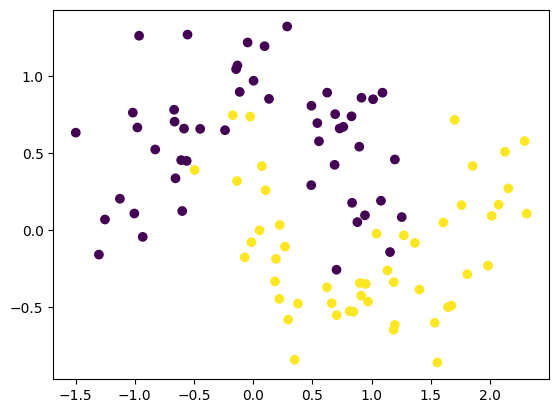

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [6]:
class yuhi(nn.Module):
    def __init__(self, input = 2, features = 128 , num_class = 1):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=num_class),
            nn.Sigmoid()
        )       

    def forward(self, x):
        return self.linear_layer(x)

model = yuhi().to(device)

In [7]:
model

yuhi(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [8]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

17025

In [9]:
# loss and optimizer
loss_fc = nn.BCELoss()

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.01)

In [10]:
# turning data into tensors
X_ten = torch.from_numpy(X).type(torch.float)
y_ten = torch.from_numpy(y).type(torch.float)

In [11]:
epochs = 2000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_ten).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_ten)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_ten).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_ten)


# lets print out what is happening
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.7030705213546753 | Validation Loss = 0.5561802387237549
Epoch: 100 | Loss: 0.06307206302881241 | Validation Loss = 0.06269076466560364
Epoch: 200 | Loss: 0.028436735272407532 | Validation Loss = 0.028892474249005318
Epoch: 300 | Loss: 0.0035664429888129234 | Validation Loss = 0.0034982298966497183
Epoch: 400 | Loss: 0.0011806103866547346 | Validation Loss = 0.0011666518403217196
Epoch: 500 | Loss: 0.0005840512458235025 | Validation Loss = 0.0005814788164570928
Epoch: 600 | Loss: 0.00035560052492655814 | Validation Loss = 0.00035453736199997365
Epoch: 700 | Loss: 0.00024098689027596265 | Validation Loss = 0.00024012316134758294
Epoch: 800 | Loss: 0.0001740422158036381 | Validation Loss = 0.0001735243567964062
Epoch: 900 | Loss: 0.00013056468742433935 | Validation Loss = 0.0001302796881645918
Epoch: 1000 | Loss: 0.00010235280933557078 | Validation Loss = 0.00010219161049462855
Epoch: 1100 | Loss: 8.239726594183594e-05 | Validation Loss = 8.231557148974389e-05
Epoch: 12

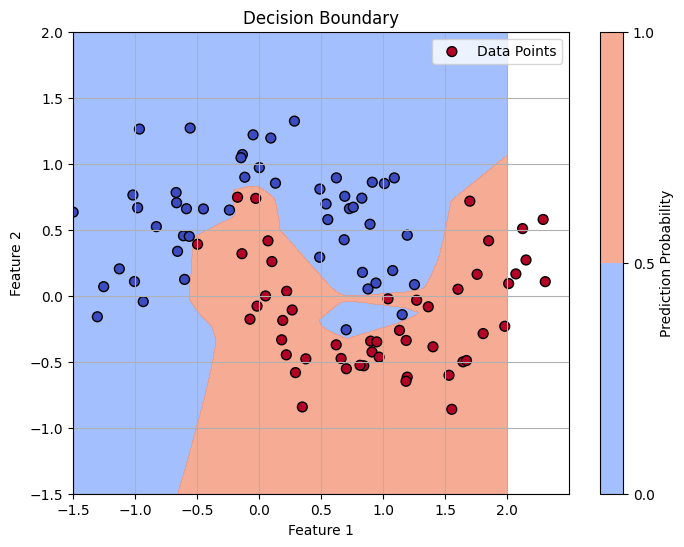

In [12]:
# 1. Generate a grid of points
x1_range = np.linspace(-1.5, 2, 200)
x2_range = np.linspace(-1.5, 2, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# 2. Predict probabilities for the grid points
with torch.no_grad():
    grid_preds = model(grid_tensor).numpy()

# 3. Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_preds.reshape(x1_grid.shape), levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.colorbar(label='Prediction Probability')

# 4. Overlay the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap='coolwarm', s=50, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.grid()
plt.show()

In [13]:
# As we can see that our model is overfitting

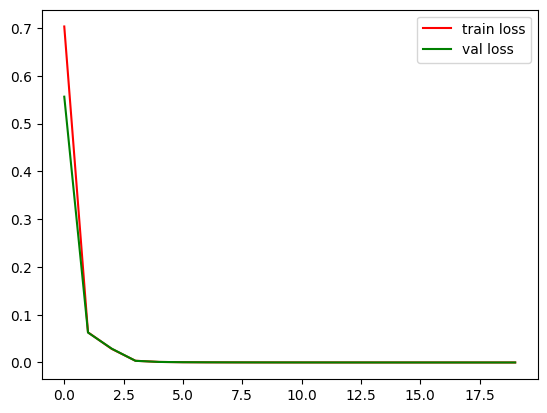

In [14]:
plt.plot(train_loss_values, c="red", label="train loss")
plt.plot(test_loss_values, c="green", label="val loss")
plt.legend()
plt.show()

# Model 2 with Regularization

In [15]:
class Regu_NN(nn.Module):
    def __init__(self, input = 2, features = 128 , num_class = 1):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=num_class),
            nn.Sigmoid()
        )       

    def forward(self, x):
        return self.linear_layer(x)

model2 = Regu_NN().to(device)

In [16]:
model2

Regu_NN(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [17]:
# loss and optimizer
loss_fc = nn.BCELoss()

optimizer = torch.optim.SGD(params = model2.parameters(),
                            lr = 0.05, weight_decay=1e-5)

In [18]:
epochs = 2000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model2.train()

  # forward pass
  y_logits = model2(X_ten).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_ten)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model2.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model2(X_ten).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_ten)


# lets print out what is happening
    if epoch % 5 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.6816174983978271 | Validation Loss = 0.668742835521698
Epoch: 5 | Loss: 0.6251649856567383 | Validation Loss = 0.6156731247901917
Epoch: 10 | Loss: 0.5816424489021301 | Validation Loss = 0.5740052461624146
Epoch: 15 | Loss: 0.5462104082107544 | Validation Loss = 0.5397971272468567
Epoch: 20 | Loss: 0.5160312056541443 | Validation Loss = 0.5105326771736145
Epoch: 25 | Loss: 0.49018964171409607 | Validation Loss = 0.48551085591316223
Epoch: 30 | Loss: 0.46840107440948486 | Validation Loss = 0.46451327204704285
Epoch: 35 | Loss: 0.450388103723526 | Validation Loss = 0.4471896290779114
Epoch: 40 | Loss: 0.43556222319602966 | Validation Loss = 0.43292945623397827
Epoch: 45 | Loss: 0.423360675573349 | Validation Loss = 0.4211936295032501
Epoch: 50 | Loss: 0.4132961928844452 | Validation Loss = 0.41150104999542236
Epoch: 55 | Loss: 0.40494194626808167 | Validation Loss = 0.4034408628940582
Epoch: 60 | Loss: 0.39790862798690796 | Validation Loss = 0.3966313600540161
Epoch: 6

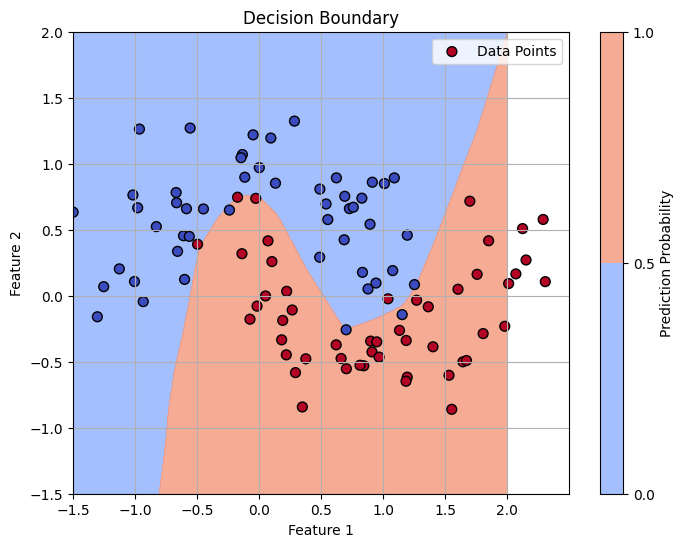

In [19]:
# 1. Generate a grid of points
x1_range = np.linspace(-1.5, 2, 200)
x2_range = np.linspace(-1.5, 2, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# 2. Predict probabilities for the grid points
with torch.no_grad():
    grid_preds = model2(grid_tensor).numpy()

# 3. Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_preds.reshape(x1_grid.shape), levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.colorbar(label='Prediction Probability')

# 4. Overlay the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap='coolwarm', s=50, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.grid()
plt.show()

In [20]:
# As we can see from above the overfitting reduced

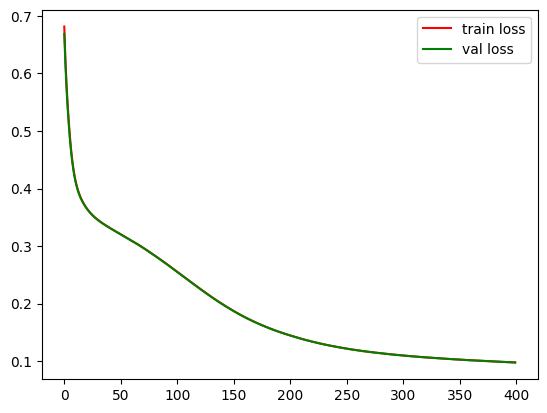

In [21]:
plt.plot(train_loss_values, c="red", label="train loss")
plt.plot(test_loss_values, c="green", label="val loss")
plt.legend()
plt.show()

In [22]:
model.state_dict()["linear_layer.0.weight"].shape

torch.Size([128, 2])

In [23]:
model1_weights = model.state_dict()["linear_layer.0.weight"].reshape(256)
model2_weights = model2.state_dict()["linear_layer.0.weight"].reshape(256)

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


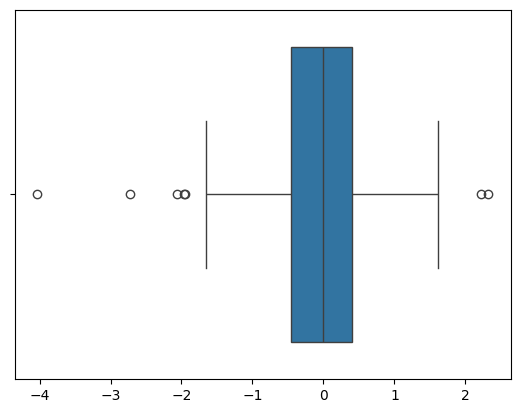

In [24]:
sns.boxplot(model1_weights, orient='h')
plt.show()

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


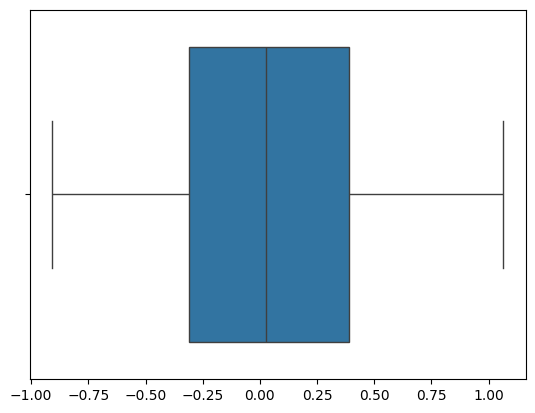

In [25]:
sns.boxplot(model2_weights, orient='h')
plt.show()

In [26]:
model1_weights.max(), model1_weights.min()

(tensor(2.3221), tensor(-4.0297))

In [27]:
model2_weights.max(), model2_weights.min()

(tensor(1.0643), tensor(-0.9075))

C:\Users\kumar\AppData\Local\Temp\ipykernel_26420\3030250951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weights, color="red", hist=False)
C:\Users\kumar\AppData\Local\Temp\ipykernel_26420\3030250951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weig

<Axes: ylabel='Density'>

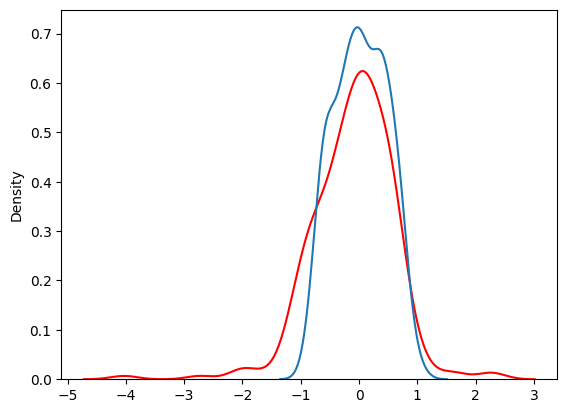

In [29]:
sns.distplot(model1_weights, color="red", hist=False)
sns.distplot(model2_weights, hist=False )